✅ Model, tokenizer, and label encoder loaded successfully!
✅ Test Loss: 0.0289
✅ Test Accuracy: 0.9914

48/48 [==============================] - 4s 54ms/step


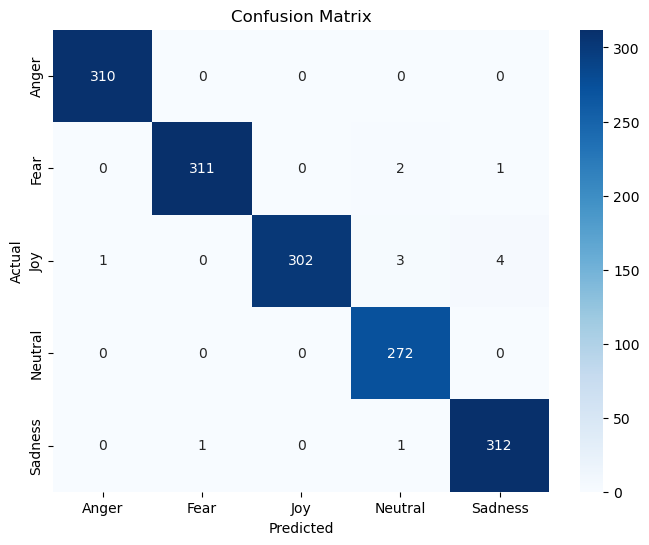

Classification Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00       310
        Fear       1.00      0.99      0.99       314
         Joy       1.00      0.97      0.99       310
     Neutral       0.98      1.00      0.99       272
     Sadness       0.98      0.99      0.99       314

    accuracy                           0.99      1520
   macro avg       0.99      0.99      0.99      1520
weighted avg       0.99      0.99      0.99      1520



In [1]:
# ---------------------------
# 1. Import Libraries
# ---------------------------
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# 2. Load Test Dataset
# ---------------------------
file_path = "C:\\Users\\Aqeela\\Desktop\\EmotiSense_Optimal\\processed\\emotion_augmented.csv"
df = pd.read_csv(file_path)
df['text'] = df['text'].astype(str)

X_test_texts = df['text'].values
y_test_labels = df['emotion'].values

# ---------------------------
# 3. Load Tokenizer and Label Encoder
# ---------------------------
tokenizer_path = "C:\\Users\\Aqeela\\Desktop\\EmotiSense_Optimal\\artifacts\\tokenizer.pkl"
with open(tokenizer_path, 'rb') as f:
    tokenizer = pickle.load(f)

label_encoder_path = "C:\\Users\\Aqeela\\Desktop\\EmotiSense_Optimal\\artifacts\\label_encoder.pkl"
with open(label_encoder_path, 'rb') as f:
    label_encoder = pickle.load(f)

# ---------------------------
# 4. Load Saved Model
# ---------------------------
model_path = "C:\\Users\\Aqeela\\Desktop\\EmotiSense_Optimal\\artifacts\\emotion_model_Bi-lstm.keras"
model = load_model(model_path)
print("✅ Model, tokenizer, and label encoder loaded successfully!")

# ---------------------------
# 5. Preprocess Test Data
# ---------------------------
max_length = 50  # Must match training
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode labels
y_test_encoded = label_encoder.transform(y_test_labels)

# ---------------------------
# 6. Evaluate Model (Loss & Accuracy)
# ---------------------------
loss, accuracy = model.evaluate(X_test_pad, 
                                pd.get_dummies(y_test_encoded),  # one-hot encode labels
                                verbose=0)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}\n")

# ---------------------------
# 7. Predictions for Metrics
# ---------------------------
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))
